In [1]:
# Setup, Version check and Common imports

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)


# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

from tensorflow import keras
from tensorflow.keras import layers

# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
# Load CIFAR100 dataset from keras datasets: 
# https://keras.io/api/datasets/cifar100/
# https://www.cs.toronto.edu/~kriz/cifar.html

# The load_data() method creates train and test sets. The parameter label_mode specifies the category labels: 'fine' or 'coarse'
# In this class we will adopt the coarse classification, corresponding to 20 categories 

from keras.datasets import cifar100

(train_images_full, train_labels_full), (test_images, test_labels) = cifar100.load_data(label_mode = 'fine')

train_labels_full = train_labels_full.squeeze()
test_labels = test_labels.squeeze()

# Normalize data
train_images_full = train_images_full / 255.0
test_images = test_images / 255.0

# We further divide the original train datasets into train and valid datasets
train_images = train_images_full[5000:]
valid_images = train_images_full[:5000]

train_labels = train_labels_full[5000:]
valid_labels = train_labels_full[:5000]


169001437/169001437 [==============================] - 4s 0us/step


In [3]:
# Confirm that the fine-grained dataset contains 100 classes

print(np. unique(train_labels))

print('Nr. of classes:', len(np. unique(train_labels)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Nr. of classes: 100


In [43]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [50]:
# Build a feed-forward NN with Keras Sequential API: https://keras.io/api/models/

# The base architecture is similar to the one used in the previous class
# Complete the missing details:

model = keras.Sequential([
    layers.Flatten(input_shape=[32,32,3]),
    layers.Dense(800, activation="elu", kernel_initializer='random_normal'),
    layers.Dense(550, activation="elu", kernel_initializer='random_normal'),
    layers.Dense(300, activation="elu", kernel_initializer='random_normal'),
    layers.Dense(200, activation="elu", kernel_initializer='random_normal'),
    layers.Dense(100, activation="softmax")
])

In [51]:

# Summary of the network architecture

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 800)               2458400   
                                                                 
 dense_8 (Dense)             (None, 550)               440550    
                                                                 
 dense_9 (Dense)             (None, 300)               165300    
                                                                 
 dense_10 (Dense)            (None, 200)               60200     
                                                                 
 dense_11 (Dense)            (None, 100)               20100     
                                                                 
Total params: 3,144,550
Trainable params: 3,144,550
No

In [52]:
# Model compilation: https://keras.io/api/models/model_training_apis/


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [ ]:
# Model training


history = model.fit(train_images, train_labels, batch_size=32, epochs=20, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/20
1407/1407 [==============================] - 52s 36ms/step - loss: 4.0638 - accuracy: 0.0896 - val_loss: 3.7868 - val_accuracy: 0.1234
Epoch 2/20
 936/1407 [==================>...........] - ETA: 16s - loss: 3.6475 - accuracy: 0.1526

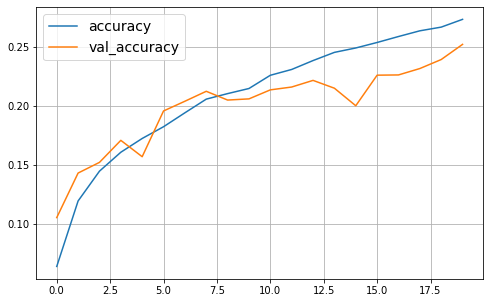

In [40]:
# Plot the evolution of the accuracy metrics

import pandas as pd

x = pd.DataFrame(history.history, columns = ['accuracy', 'val_accuracy'])
x.plot(figsize=(8, 5))
plt.grid(True)
plt.show()
     

# Nova secção

In [41]:
# Model evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 11s 34ms/step - loss: 3.0782 - accuracy: 0.2530
Test Accuracy: 0.2529999911785126


In [42]:
model.save("Modelo2_Trabalho_Laboratorial")